In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv(r"C:\Users\MARKALA MANASWINI\Downloads\Fish.csv")

In [3]:
dataset.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [4]:
dataset.head(1)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.02


In [5]:
dataset.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
x=dataset.iloc[:,dataset.columns!='Weight'].values
y=dataset.iloc[:,1].values

In [7]:
x.shape

(159, 6)

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("oh",OneHotEncoder(),[0])],remainder="passthrough")
x=ct.fit_transform(x)

In [9]:
x

array([[1.0, 0.0, 0.0, ..., 30.0, 11.52, 4.02],
       [1.0, 0.0, 0.0, ..., 31.2, 12.48, 4.3056],
       [1.0, 0.0, 0.0, ..., 31.1, 12.3778, 4.6961],
       ...,
       [0.0, 0.0, 0.0, ..., 13.8, 2.2769999999999997, 1.2558],
       [0.0, 0.0, 0.0, ..., 15.2, 2.8728, 2.0672],
       [0.0, 0.0, 0.0, ..., 16.2, 2.9322, 1.8792]], dtype=object)

In [10]:
x.shape

(159, 12)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
ypred=mlr.predict(x_test)

In [14]:
ypred

array([  18.73825424,   11.88642049,  187.71128095,  332.73989462,
        212.09701648,  757.76161609,  -61.14301932,  255.77252524,
        260.49479187, 1148.32283034,  600.42812967,  852.95666864,
        541.6348983 ,  140.05796526,  680.96324928,  818.78498332,
       1009.77141718,  289.70475993,  226.06716705,  585.13887424,
        -11.02265194,  585.70704112,  509.58219989,  492.02110639,
        814.27086551,  964.09005079,  219.24045431,  356.93819832,
        -90.40664262,  -11.87462241,  575.80799591,  -18.41252664])

In [15]:
y_test

array([  78. ,   13.4,  200. ,  270. ,  150. , 1000. ,    7. ,  180. ,
        188. , 1250. ,  650. , 1000. ,  600. ,  150. ,  700. ,  920. ,
       1000. ,  218. ,  225. ,  700. ,   10. ,  610. ,  500. ,  500. ,
        955. , 1100. ,  170. ,  270. ,    6.7,    9.9,  510. ,   70. ])

In [16]:
from sklearn.metrics import r2_score
accuracy=r2_score(ypred,y_test)

In [17]:
accuracy

0.9396479087980916

In [18]:
dataset.head(1)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.02


In [19]:
yp=mlr.predict(ct.transform([["Bream",44.5,40,60,11.7,8.9]]))

In [20]:
yp

array([1048.07783248])

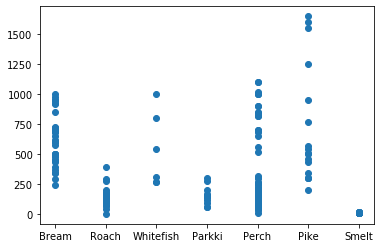

In [22]:
import matplotlib.pyplot as plt
plt.scatter(dataset["Species"],dataset["Weight"])
plt.show()